In [5]:
# batch fitting:
from tqdm.notebook import tqdm
    
import sys
sys.path.append('/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/nEXO_reconstruction')

def fitting(fitter, loader, input_list, labels, x0, y0, z0, q0):


    # Load the pre-produced grid PDFs:
    fitter.load_gridPDFs()

    fit_results = {}

    for i, filename in tqdm(enumerate(input_list)):
        loader.toyMC_filename = filename
        tmp_dict = {}
        x_fit, y_fit, z_fit, q_fit = [], [], [], []
        print(filename)
        for evtid in tqdm(range(10000)):
            flag = loader.load_h5file_multiChannels(evtid)
            if not flag:
                continue
            #loader.display_event_multiChannels(evtid)
            times, wfs, sxs, sys, ystrips = loader.assembling_for_fitter()

            m = fitter.oneCluster_fitting(times, wfs, 0., x0, y0, z0, q0, sxs, sys, ystrips)
            
            # Sometimes, parameters are close to the fitting range, which might indicate a failed fitting.
            
            x_fit.append(m.values['x0'])
            y_fit.append(m.values['y0'])
            z_fit.append(m.values['z0'])
            q_fit.append(m.values['Q0'])

        tmp_dict['fit_x'] = x_fit
        tmp_dict['fit_y'] = y_fit
        tmp_dict['fit_z'] = z_fit
        tmp_dict['fit_q'] = q_fit

        fit_results[labels[i]] = tmp_dict

    return fit_results


In [6]:

input_list = [ 
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y-18-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y-12-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y-6-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y0-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y6-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y12-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y18-q100000.0x3.0y0.0z100.0.h5' ,\
             ]

labels = ['X0Y-18','X0Y-12', 'X0Y-6', 'X0Y0', 'X0Y6', 'X0Y12', 'X0Y18']

x0, y0, z0, q0, t0 = 3.0, 0.0, 100., 1.0, 0

from importlib import reload
import waveform_fit

reload(waveform_fit)
from waveform_fit import fitter
    
fitter = fitter(SamplingFrequency=2)

from toyMC_loader import toyMC_loader
loader = toyMC_loader()

fit_results0 = fitting(fitter, loader, input_list, labels, x0, y0, z0, q0)

0it [00:00, ?it/s]

/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y-18-q100000.0x3.0y0.0z100.0.h5


  0%|          | 0/10000 [00:00<?, ?it/s]

3.0 18.0
3.00030000019998 18.0
2.99969999980002 18.0
3.000199005611792 18.0
2.999800994388208 18.0
3.0 18.001000007406816
3.0 17.998999992593184
3.0 18.00016791010867
3.0 17.99983208989133
3.0 18.0
3.0 18.0
3.0 18.0
3.0 18.0
3.0 18.0
3.0 18.0
3.0 18.0
3.0 18.0
3.000199005611792 18.0
3.000995028058261 18.0
3.0029850841572694 18.0
3.0089552519989327 18.0
3.02686574322915 18.0
3.080596884961441 18.0
3.1989997738749554 18.0
3.1991617844722704 18.0
3.198837763254422 18.0
3.2006198788001545 18.0
3.197379666627911 18.0
3.1989997738749554 18.000068671060983
3.1989997738749554 17.999931328939017
3.1989997738749554 18.0
3.1989997738749554 18.0
3.1989997738749554 18.0
3.1989997738749554 18.0
3.1989997738749554 17.999931328939017
3.1989997738749554 17.999656644695115
3.1989997738749554 17.998969934086066
3.1989997738749554 17.99690980227763
3.1989997738749554 17.9907294073575
3.1989997738749554 17.972188236236956
3.1989997738749554 17.93132917889327
3.215200715524935 17.93132917889327
3.1827986000

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
    
def plot_histograms(fit_results, lgflag=True):
    print(fit_results.keys())
    _, ax = plt.subplots(1, 4, figsize=(14, 4))
    for i, (lb, tmpdict) in enumerate(fit_results.items()):
        ax[0].hist(tmpdict['fit_x'], bins=50, range=(-40, 40),    histtype='step', lw=1.5, label=lb)
        ax[1].hist(tmpdict['fit_y'], bins=50, range=(-6.0, 6.0),  histtype='step', lw=1.5, label=lb)
        ax[2].hist(tmpdict['fit_z'], bins=50, range=(97, 103),    histtype='step', lw=1.5, label=lb)
        ax[3].hist(np.array(tmpdict['fit_q'])*1e5, bins=50, range=(0., 2e5),    histtype='step', lw=1.5, label=lb)

    ax[0].set_xlabel('fit x [mm]', fontsize=12)
    ax[0].tick_params(axis='both', labelsize=12)
    ax[0].semilogy()
    ax[1].set_xlabel('fit y [mm]', fontsize=12)
    ax[1].tick_params(axis='both', labelsize=12)
    ax[1].semilogy()
    ax[2].set_xlabel('fit z [mm]', fontsize=12)
    ax[2].tick_params(axis='both', labelsize=12)
    ax[2].semilogy()
    ax[3].set_xlabel('fit q', fontsize=12)
    ax[3].tick_params(axis='both', labelsize=12)
    ax[3].semilogy()

    if lgflag:
        ax[2].legend(prop={'size':8})
    plt.tight_layout()
    plt.show()

    '''
    print('-> X resolution:')
    for lb, fits in fit_results.items():
        stddev = np.std(fits['fit_x']) 
        mean = np.mean(fits['fit_x'])
        res = stddev / mean
        bias = (np.mean(fits['fit_x'])- 3.0) / 3.0
        print(f'{lb}: resolution {res*100:.3}% with {bias*100:.3}% bias (mean = {mean:.3f}, stddev = {stddev:.3f}).')

    print('-> Y resolution:')
    for lb, fits in fit_results.items():
        stddev = np.std(fits['fit_y']) 
        mean = np.mean(fits['fit_y'])
        res = stddev / mean
        bias = (np.mean(fits['fit_y'])- 1.0) / 1.0
        print(f'{lb}: resolution {res*100:.3}% with {bias*100:.3}% bias (mean = {mean:.3f}, stddev = {stddev:.3f}).')

    print('-> Z resolution:')
    for lb, fits in fit_results.items():
        stddev = np.std(fits['fit_z']) 
        mean = np.mean(fits['fit_z'])
        res = stddev / mean
        bias = (np.mean(fits['fit_z'])- 100.0) / 100.0
        print(f'{lb}: resolution {res*100:.3}% with {bias*100:.3}% bias (mean = {mean:.3f}, stddev = {stddev:.3f}).')

    print('-> Energy reconstruction:')
    for lb, fits in fit_results.items():
        stddev = np.std(fits['fit_q']) *1e5
        mean = np.mean(fits['fit_q']) *1e5
        res = stddev / mean
        bias = (np.mean(fits['fit_q'])*1e5 - 1e5) /1e5
        print(f'{lb}: resolution {res*100:.3}% with {bias*100:.3}% bias (mean = {mean:.3f}, stddev = {stddev:.3f}).')
    '''


def plot_linecharts(fit_results, x0=1, y0=0, z0=100, q0=1e5, xticklabel=6):
    fig, ax = plt.subplots(2, 4, figsize=(16, 7))
    x_fit_bias, x_fit_res = [], []
    y_fit_bias, y_fit_res = [], []
    z_fit_bias, z_fit_res = [], []
    q_fit_bias, q_fit_res = [], []
    
    xticks = []
    for lb, tmpdict in fit_results.items():
        x_fit_bias.append( (np.mean(tmpdict['fit_x']) - x0))
        x_fit_res.append(np.std(tmpdict['fit_x']))
    
        y_fit_bias.append( (np.mean(tmpdict['fit_y']) - y0))
        y_fit_res.append(np.std(tmpdict['fit_y']))
    
        z_fit_bias.append( (np.mean(tmpdict['fit_z']) - z0))
        z_fit_res.append(np.std(tmpdict['fit_z']))
    
        q_fit_bias.append( (np.mean(tmpdict['fit_q'])*1e5 - q0))
        q_fit_res.append(np.std(tmpdict['fit_q']) / np.mean(tmpdict['fit_q'])*100)
        
        xticks.append(lb)
    
    ax[0, 0].plot(x_fit_bias, 'o-', color='blue')
    ax[1, 0].plot(x_fit_res, 's-',  color='crimson')
    ax[0, 1].plot(y_fit_bias, 'o-', color='blue')
    ax[1, 1].plot(y_fit_res, 's-', color='crimson')
    ax[0, 2].plot(z_fit_bias, 'o-', color='blue')
    ax[1, 2].plot(z_fit_res, 's-', color='crimson')
    ax[0, 3].plot(q_fit_bias, 'o-', color='blue')
    ax[1, 3].plot(q_fit_res, 's-', color='crimson')
    for i in range(4):
        ax[0, i].hlines(0, 0, len(x_fit_bias)+1, color='orange', lw=2, linestyle='--')
    
    ax[0, 0].set_ylabel('x bias [mm]', fontsize=12)
    ax[0, 0].tick_params(axis='y', labelsize=12)
    ax[0, 0].tick_params(axis='x', labelsize=0)
    ax[0, 1].set_ylabel('y bias [mm]', fontsize=12)
    ax[0, 1].tick_params(axis='y', labelsize=12)
    ax[0, 1].tick_params(axis='x', labelsize=0)
    ax[0, 2].set_ylabel('z bias [mm]', fontsize=12)
    ax[0, 2].tick_params(axis='y', labelsize=12)
    ax[0, 2].tick_params(axis='x', labelsize=0)
    ax[0, 3].set_ylabel('q bias', fontsize=12)
    ax[0, 3].tick_params(axis='y', labelsize=12)
    ax[0, 3].tick_params(axis='x', labelsize=0)
    ax[1, 0].set_ylabel('x resolution [mm]', fontsize=12)
    ax[1, 0].tick_params(axis='both', labelsize=12)
    ax[1, 1].tick_params(axis='both', labelsize=12)
    ax[1, 1].set_ylabel('y resolution [mm]', fontsize=12)
    ax[1, 2].tick_params(axis='both', labelsize=12)
    ax[1, 2].set_ylabel('z resolution [mm]', fontsize=12)
    ax[1, 3].tick_params(axis='both', labelsize=12)
    ax[1, 3].set_ylabel('q resolution [%]', fontsize=12)
    
    #ax[1, 2].legend(prop={'size':12})
    
    ax[1, 0].set_xticks(range(len(xticks)), xticks, rotation=60, fontsize=xticklabel)
    ax[1, 1].set_xticks(range(len(xticks)), xticks, rotation=60, fontsize=xticklabel)
    ax[1, 2].set_xticks(range(len(xticks)), xticks, rotation=60, fontsize=xticklabel)
    ax[1, 3].set_xticks(range(len(xticks)), xticks, rotation=60, fontsize=xticklabel)
    
    fig.text(0.39, 0.98, f'{q0} point charge at ({x0} mm, {y0} mm, {z0} mm)', fontsize=12)
    
    
    plt.tight_layout()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


dict_keys(['X0Y-18', 'X0Y-12', 'X0Y-6', 'X0Y0', 'X0Y6', 'X0Y12', 'X0Y18'])


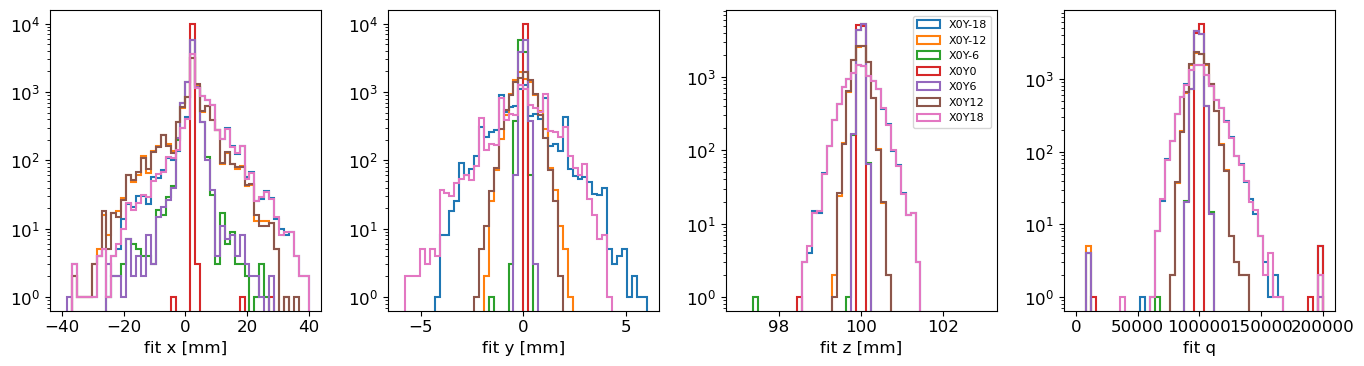

In [130]:
plot_histograms(fit_results0)

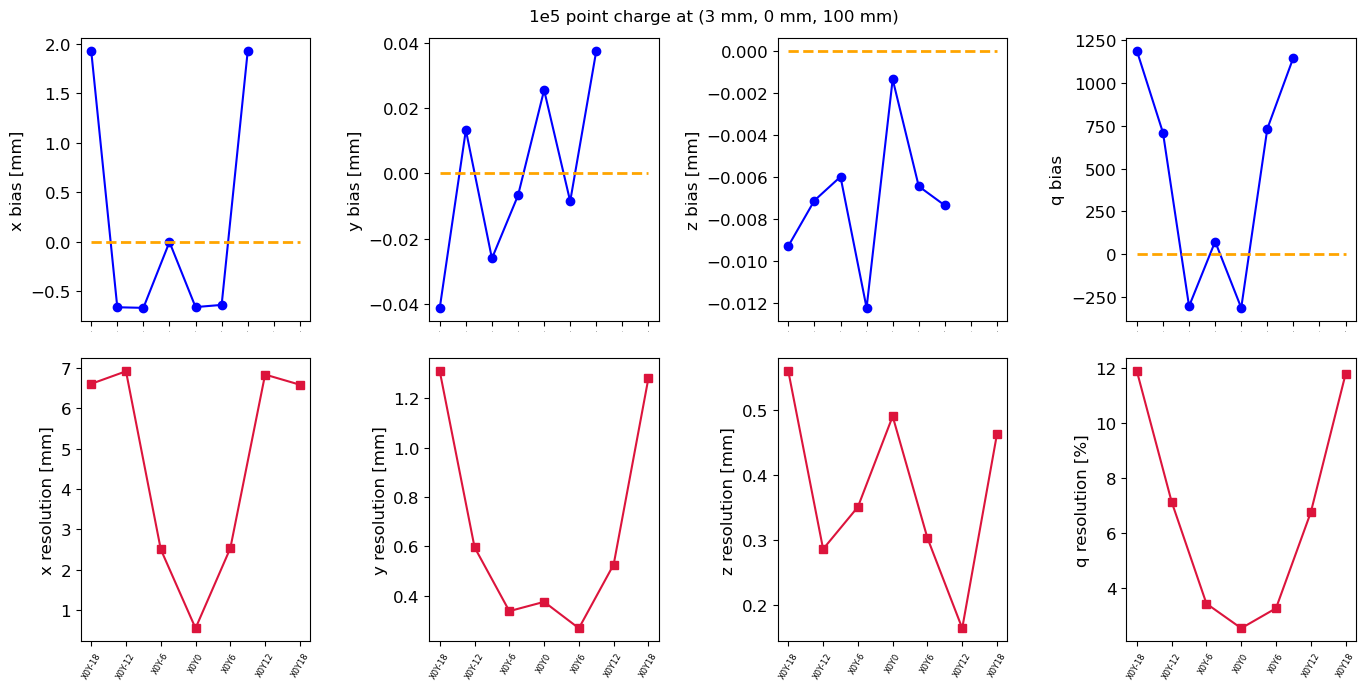

In [131]:
plot_linecharts(fit_results0)

In [22]:
# Dataset: different combination of x and y strips:


input_list = [ 
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y-6-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y0-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y6-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y0x0y-6-ystrip-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y0x0y6-ystrip-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y-6x0y0x0y6-ystrip-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y0x0y6-ystripx0y0-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y0x0y6-ystripx0y0x6y0-q100000.0x3.0y0.0z100.0.h5' ,\
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y0x0y6x0y-6-ystripx0y0x6y0x-6y0-q100000.0x3.0y0.0z100.0.h5' ,\
             ]

labels = ['x-strip: X0Y-6', 'x-strip: X0Y0', 'x-strip: X0Y6', 'x-strip: X0Y0X0Y-6', 'x-strip: X0Y0X0Y6', 'x-strip: X0Y-6X0Y0X0Y6', 'x-strip: X0Y0X0Y6, y-strip: X0Y0', 'x-strip: X0Y0X0Y6, y-strip: X0Y0X6Y0', 'x-strip: X0Y-6X0Y0X0Y6, y-strip: X0Y0X6Y0X-6Y0']

x0, y0, z0, q0, t0 = 3.0, 0.0, 100., 1.0, 0

from importlib import reload
import waveform_fit

reload(waveform_fit)
from waveform_fit import fitter
    
fitter = fitter(SamplingFrequency=2)

from toyMC_loader import toyMC_loader
loader = toyMC_loader()

fit_results = fitting(fitter, loader, input_list, labels, x0, y0, z0, q0)

0it [00:00, ?it/s]

/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y-6-q100000.0x3.0y0.0z100.0.h5


  0%|          | 0/10000 [00:00<?, ?it/s]

Error when loading group event_3.
Error when loading group event_5.
Error when loading group event_6.
Error when loading group event_30.
Error when loading group event_31.
Error when loading group event_32.
Error when loading group event_33.
Error when loading group event_34.
Error when loading group event_35.
Error when loading group event_51.
Error when loading group event_53.
Error when loading group event_63.
Error when loading group event_260.
Error when loading group event_304.
Error! There is no boundary points for (41.23424160401749, 0.8765309907756649)!!! CHECK-REQUIRED!!!
Error when loading group event_339.
Error when loading group event_340.
Error when loading group event_341.
Error when loading group event_342.
Error when loading group event_343.
Error! There is no boundary points for (41.99689055032741, 1.8756035203952797)!!! CHECK-REQUIRED!!!
Error when loading group event_630.
Error! There is no boundary points for (41.869134061549005, 1.3081317082117057)!!! CHECK-REQUIR

  0%|          | 0/10000 [00:00<?, ?it/s]

Error when loading group event_264.
Error when loading group event_265.
Error when loading group event_266.
Error when loading group event_267.
Error when loading group event_268.
Error when loading group event_269.
Error when loading group event_608.
Error when loading group event_679.
Error when loading group event_680.
Error when loading group event_681.
Error when loading group event_2640.
Error when loading group event_2641.
Error when loading group event_2642.
Error when loading group event_2643.
/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y6-q100000.0x3.0y0.0z100.0.h5


  0%|          | 0/10000 [00:00<?, ?it/s]

Error when loading group event_4.
Error when loading group event_40.
Error! There is no boundary points for (41.98975047277103, 1.227874571349675)!!! CHECK-REQUIRED!!!
Error when loading group event_80.
Error when loading group event_81.
Error! There is no boundary points for (40.82572753056892, 1.8348921424955407)!!! CHECK-REQUIRED!!!
Error when loading group event_399.
Error when loading group event_402.
Error! There is no boundary points for (41.99689055032741, 1.8756035203952797)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.869134061549005, 1.3081317082117057)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.979660016503026, 0.6418775879056096)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.96008275886271, 1.3300658405748074)!!! CHECK-REQUIRED!!!
Error when loading group event_770.
Error! There is no boundary points for (40.62046464906773, 1.6471835370534258)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.959271666

  0%|          | 0/10000 [00:00<?, ?it/s]

Error! There is no boundary points for (41.92359659830798, 1.986099157232479)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.62245313397484, 0.7568052647886583)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.79692806656919, 0.35062017009069574)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.73360603088572, 1.8349506321053204)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.502983007786014, 1.0323223669672483)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.53022844090301, 0.7582376002033566)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.53022844090301, 0.7582376002033566)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.53022844090301, 0.7582376002033566)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.53022844090301, 0.7582376002033566)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.91897446468277, 1.8905897242870975)!!! CHECK-REQUIRED!!!

  0%|          | 0/10000 [00:00<?, ?it/s]

Error! There is no boundary points for (41.92359659830798, 1.986099157232479)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.62245313397484, 0.7568052647886583)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.79692806656919, 0.35062017009069574)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.73360603088572, 1.8349506321053204)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.95310707382866, 1.0323130018959716)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (40.1297635936359, 1.9457318429884716)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.91897446468277, 1.8905897242870975)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.98366351016429, 1.8786785386894564)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.96799586123307, 0.6203476844515707)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.915700125143196, 1.4528528251304653)!!! CHECK-REQUIRED!!!


  0%|          | 0/10000 [00:00<?, ?it/s]

Error! There is no boundary points for (41.954908050360245, 0.05620040069634391)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.92255459710317, 0.13299073243546441)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (40.17379372108949, 1.8271722641499824)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (40.17379372108949, 1.8271722641499824)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (40.17379372108949, 1.8271722641499824)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (40.49838486069805, 1.7793706101869162)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.90750059808234, 1.9767290076251696)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.75264739540821, 1.9274125932702573)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.967757720175435, 1.5669158411088948)!!! CHECK-REQUIRED!!!
Error! There is no boundary points for (41.89376181868447, 0.611111492942949)!!! CHECK-REQUIRED!

  0%|          | 0/10000 [00:00<?, ?it/s]

Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have 

  0%|          | 0/10000 [00:00<?, ?it/s]

Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Error! There is no boundary points for (40.51971701615934, 1.5570203272813083)!!! CHECK-REQUIRED!!!
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have ru

  0%|          | 0/10000 [00:00<?, ?it/s]

Error! There is no boundary points for (40.57021816160636, 1.6708153115132065)!!! CHECK-REQUIRED!!!
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Error! There is no boundary points for (41.77822094741973, 0.47782130855814403)!!! CHECK-REQUIRED!!!
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run out of the ROI.
Fitting x or y parameters have run

dict_keys(['x-strip: X0Y-6', 'x-strip: X0Y0', 'x-strip: X0Y6', 'x-strip: X0Y0X0Y-6', 'x-strip: X0Y0X0Y6', 'x-strip: X0Y-6X0Y0X0Y6', 'x-strip: X0Y0X0Y6, y-strip: X0Y0', 'x-strip: X0Y0X0Y6, y-strip: X0Y0X6Y0', 'x-strip: X0Y-6X0Y0X0Y6, y-strip: X0Y0X6Y0X-6Y0'])


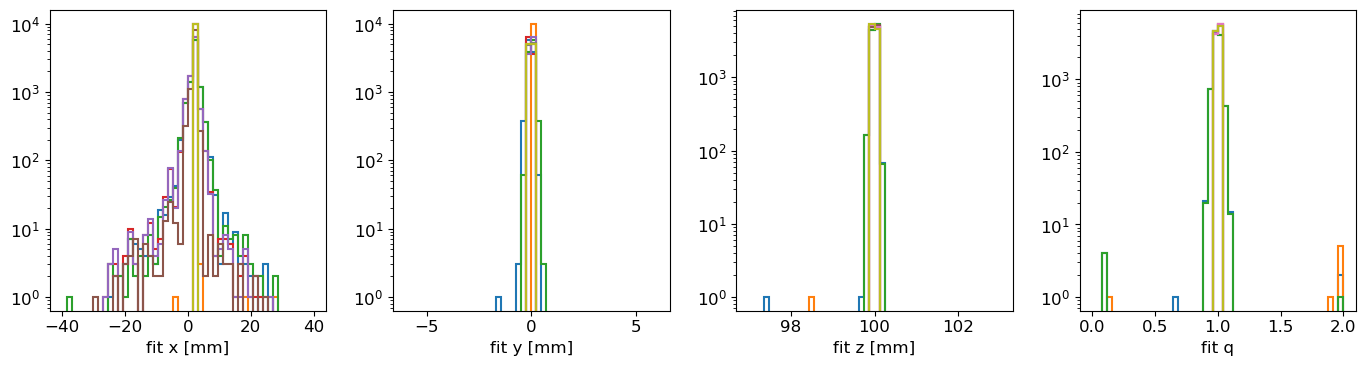

In [53]:
plot_histograms(fit_results)

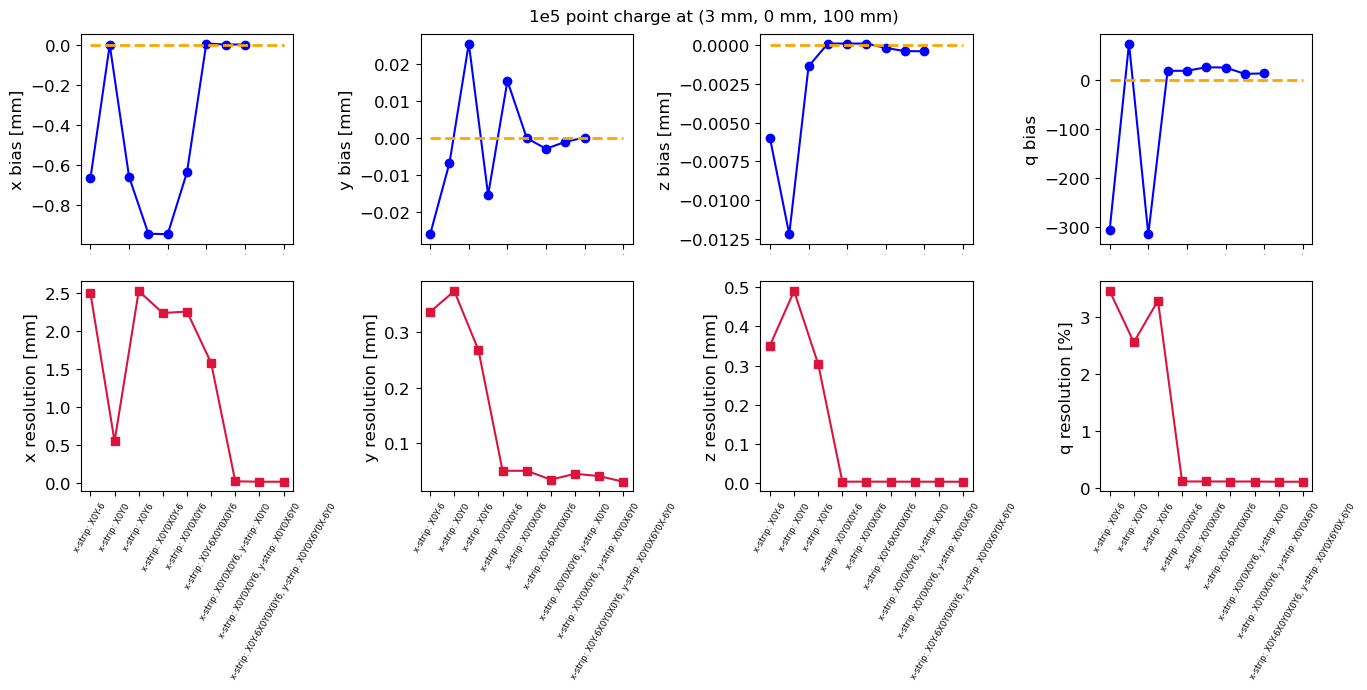

In [15]:
plot_linecharts(fit_results)

In [19]:
fitq = fit_results['x-strip: X0Y0']['fit_q']

res = np.std(fitq) / np.mean(fitq)

print(f'resolution for one collection strip only with 1e5 point charges: {res*100:.3f}%.')

resolution for one collection strip only with 1e5 point charges: 2.554%.


In [12]:
import numpy as np
from iminuit import Minuit, cost


def gaussian_fitting(x):
    
    # define the gaussian PDF with 3 parameters:
    def gaussian(x, mu, sigma):
        return (1/np.sqrt(2*np.pi)/sigma) * np.exp(-(x-mu)**2/2/sigma**2)

    # define the loss function for fitting:
    c = cost.UnbinnedNLL(x, gaussian)
    m = Minuit(c, mu=np.mean(x), sigma=np.std(x))
    m.limits['mu']    = (0.99*np.mean(x), 1.01*np.mean(x))
    m.limits['sigma'] = (0, None)
    m.migrad()
    
    return m

In [124]:
fitq = fit_results['x-strip: X0Y0']['fit_q']
fitq = np.array(fitq)
fitq = fitq[np.where(fitq>0.90)]
fitq = fitq[np.where(fitq<1.10)]
m = gaussian_fitting(fitq)

print(f"Fitted charge resolution is {m.values['sigma']/m.values['mu']*100:.2f}%.")
print(f"Fitted charge bias is {(m.values['mu']*1e5-1e5)/1e5*100:.2f}%.")

m

Fitted charge resolution is 0.12%.
Fitted charge bias is 0.02%.


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.053e+05                 │              Nfcn = 32               │
│ EDM = 2.49e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 1.000236  │ 0.000012  │            │            │0.990234 │ 1.01024 │       │
│ 1 │ sigma │ 1.239e-3  │ 0.009e-3  │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 1.57e-10 1.57e-11 │
│ sigma │ 1.57e-11 7.85e-11 │
└───────┴───────────────────┘

In [106]:
m.interactive()

In [36]:
def draw_charge_reconstruction(fit_results0, truth, xticksize=12):
    
    res_arr, bias_arr, lbs = [], [], []
    
    for name, value in fit_results0.items():
        fitq = np.array( value['fit_q'])
        # filtering abnormal results, which increase the standard deviation strongly. NOT A ROBUST FITTER YET!!!!
        fitq = fitq[np.where(fitq > 0.9)]
        fitq = fitq[np.where(fitq < 1.1)]

        m = gaussian_fitting(fitq)

        res = m.values['sigma'] / m.values['mu'] * 100
        res_arr.append(res)
        
        bias = (m.values['mu'] - truth) / truth * 100
        bias_arr.append(bias)
        
        lbs.append(name)

        print(f'+++ Resolution from fitting: {res:.4f}% with {name}.')
        print(f'--- Bias from fitting: {bias:.4f}% with {name}.')
        
    _, ax = plt.subplots(1, 2, figsize=(12, 8))
    ax[0].plot(bias_arr, 'o-', color='red', lw=2, ms=7)
    ax[0].set_xticks(range(len(lbs)), lbs, rotation=45, fontsize=xticksize)
    ax[0].set_ylabel('charge bias [%]', fontsize=12)
    ax[0].tick_params(axis='y', labelsize=12)
    ax[0].grid(linestyle=':')
    ax[1].plot(res_arr, 'D--', color='orange', lw=2, ms=7)
    ax[1].set_xticks(range(len(lbs)), lbs, rotation=45, fontsize=xticksize)
    ax[1].set_ylabel('charge resolution [%]', fontsize=12)
    ax[1].tick_params(axis='y', labelsize=12)
    ax[1].grid(linestyle=':')
        
    plt.tight_layout()
    plt.show()

+++ Resolution from fitting: 5.2582% with X0Y-18.
--- Bias from fitting: -0.1534% with X0Y-18.
+++ Resolution from fitting: 4.9108% with X0Y-12.
--- Bias from fitting: 0.0870% with X0Y-12.
+++ Resolution from fitting: 2.5384% with X0Y-6.
--- Bias from fitting: -0.2843% with X0Y-6.
+++ Resolution from fitting: 0.1239% with X0Y0.
--- Bias from fitting: 0.0236% with X0Y0.
+++ Resolution from fitting: 2.5400% with X0Y6.
--- Bias from fitting: -0.2869% with X0Y6.
+++ Resolution from fitting: 4.9062% with X0Y12.
--- Bias from fitting: 0.0734% with X0Y12.
+++ Resolution from fitting: 5.2487% with X0Y18.
--- Bias from fitting: -0.1772% with X0Y18.


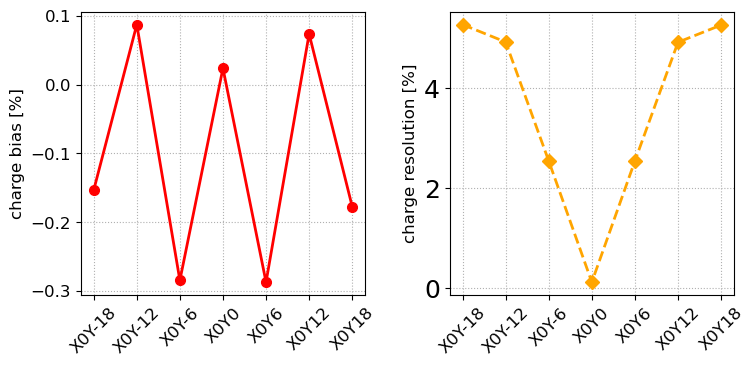

In [161]:
draw_charge_reconstruction(fit_results0, 1.0)

In [ ]:
# Dataset: different combination of x and y strips:

path = '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/'
input_list, labels = [], []
for i in range(-36, 37, 2):
    input_list.append(path+f'data-xstripx0.0y{i}-q100000.0x1.0y0.0z100.0.h5')
    labels.append(f'X0Y{i}')

x0, y0, z0, q0, t0 = 1.0, 0.0, 100., 1.0, 0

from importlib import reload
import waveform_fit

reload(waveform_fit)
from waveform_fit import fitter
    
fitter = fitter(SamplingFrequency=2)

from toyMC_loader import toyMC_loader
loader = toyMC_loader()

fit_results = fitting(fitter, loader, input_list, labels, x0, y0, z0, q0)

# Load the fitting results in to a h5 file already, named fit.h5 in this folder

In [23]:
# Functions for reading or saving fitting results into h5 files.
import h5py
def write_fit_into_h5(h5name, fit_results):
    with h5py.File(h5name, 'w') as f:
        for strip_name, strip_fit in fit_results.items():
            g = f.create_group(strip_name)
            
            for fit_name, fit_val in strip_fit.items():
               g.create_dataset(fit_name, data=fit_val)
               

def read_fit_from_h5(h5name):
    fit_results = {}
    with h5py.File(h5name, 'r') as f:
        for groupname in f.keys():
            tmp_dict = {}
            for dsetname in f[groupname].keys(): 
                tmp_dict[dsetname] = f[groupname][dsetname] [:]
            fit_results[groupname] = tmp_dict
    return fit_results


In [24]:
write_fit_into_h5('combined_strip_fit.h5', fit_results)

In [3]:
fit_results_xstrip = read_fit_from_h5('./fit.h5');

fit_results_filtered = {}
for y in range(-20, 21, 2):
    dict_name = f'X0Y{y}'
    fit_results_filtered[dict_name] = fit_results_xstrip[dict_name]

dict_keys(['X0Y-20', 'X0Y-18', 'X0Y-16', 'X0Y-14', 'X0Y-12', 'X0Y-10', 'X0Y-8', 'X0Y-6', 'X0Y-4', 'X0Y-2', 'X0Y0', 'X0Y2', 'X0Y4', 'X0Y6', 'X0Y8', 'X0Y10', 'X0Y12', 'X0Y14', 'X0Y16', 'X0Y18', 'X0Y20'])


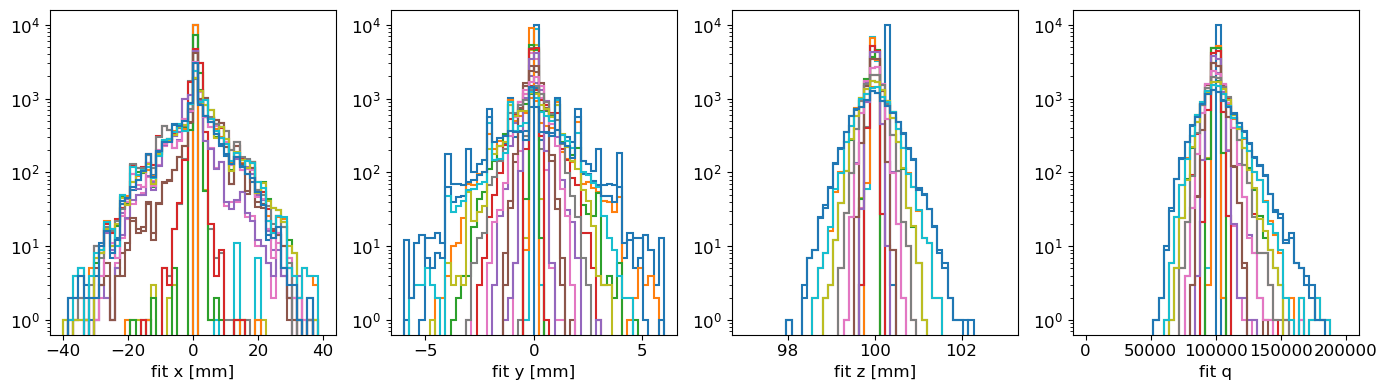

In [4]:
plot_histograms(fit_results_filtered, lgflag=False)

dict_keys(['x-strip: X0Y-6', 'x-strip: X0Y0', 'x-strip: X0Y6', 'x-strip: X0Y0X0Y-6', 'x-strip: X0Y0X0Y6', 'x-strip: X0Y-6X0Y0X0Y6', 'x-strip: X0Y0X0Y6, y-strip: X0Y0', 'x-strip: X0Y0X0Y6, y-strip: X0Y0X6Y0', 'x-strip: X0Y-6X0Y0X0Y6, y-strip: X0Y0X6Y0X-6Y0'])


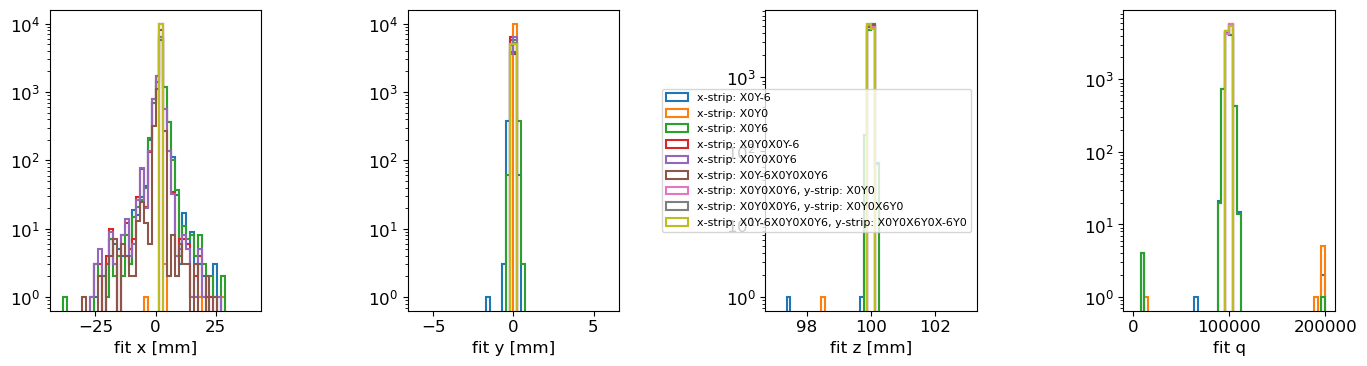

In [26]:
plot_histograms(fit_results, lgflag=True)

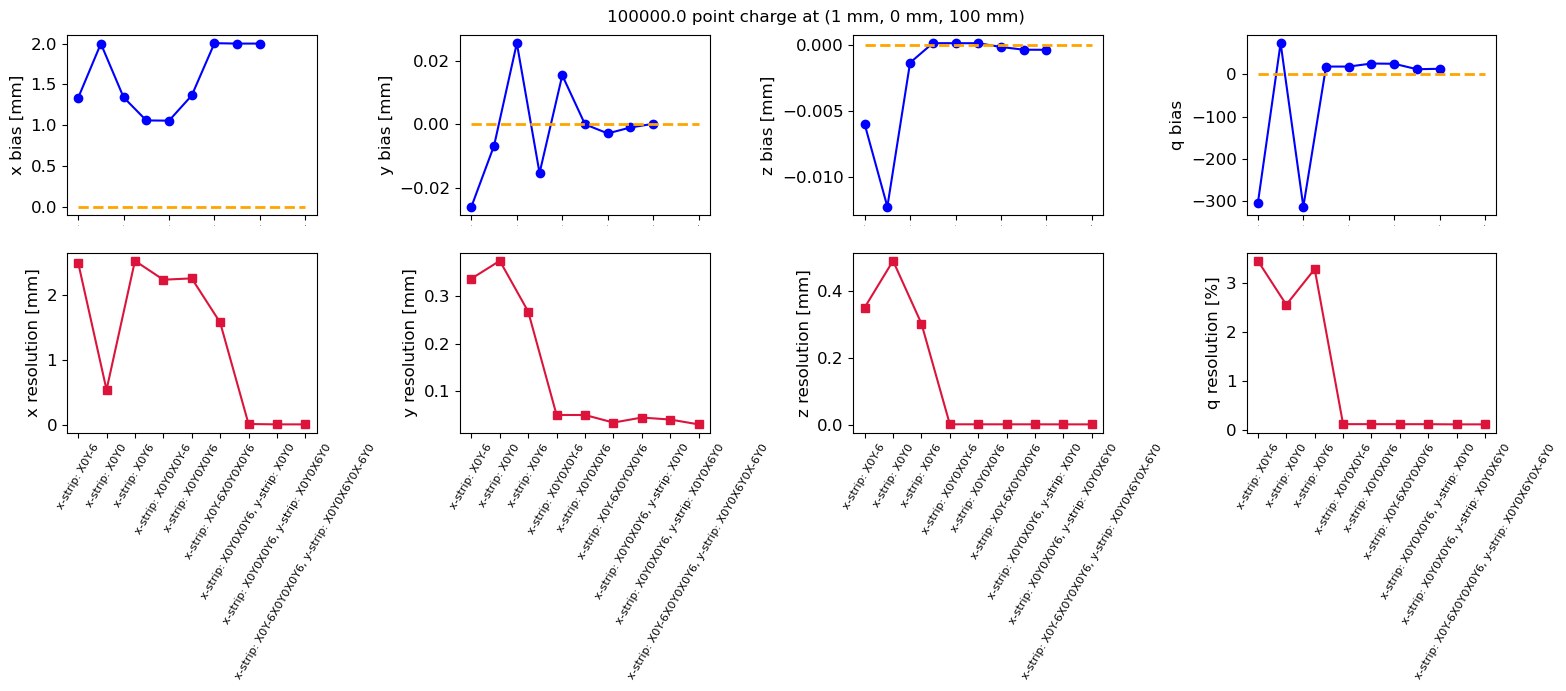

In [28]:
plot_linecharts(fit_results, xticklabel=8)

+++ Resolution from fitting: 5.3595% with X0Y-20.
--- Bias from fitting: -0.3028% with X0Y-20.
+++ Resolution from fitting: 5.3096% with X0Y-18.
--- Bias from fitting: -0.1771% with X0Y-18.
+++ Resolution from fitting: 5.2094% with X0Y-16.
--- Bias from fitting: 0.1964% with X0Y-16.
+++ Resolution from fitting: 5.1479% with X0Y-14.
--- Bias from fitting: 0.0817% with X0Y-14.
+++ Resolution from fitting: 4.8980% with X0Y-12.
--- Bias from fitting: 0.0916% with X0Y-12.
+++ Resolution from fitting: 4.3527% with X0Y-10.
--- Bias from fitting: 0.0706% with X0Y-10.
+++ Resolution from fitting: 3.6200% with X0Y-8.
--- Bias from fitting: 0.0010% with X0Y-8.
+++ Resolution from fitting: 2.6942% with X0Y-6.
--- Bias from fitting: 0.0252% with X0Y-6.
+++ Resolution from fitting: 1.8824% with X0Y-4.
--- Bias from fitting: 0.0123% with X0Y-4.
+++ Resolution from fitting: 0.8494% with X0Y-2.
--- Bias from fitting: 0.0367% with X0Y-2.
+++ Resolution from fitting: 0.1220% with X0Y0.
--- Bias from fitt

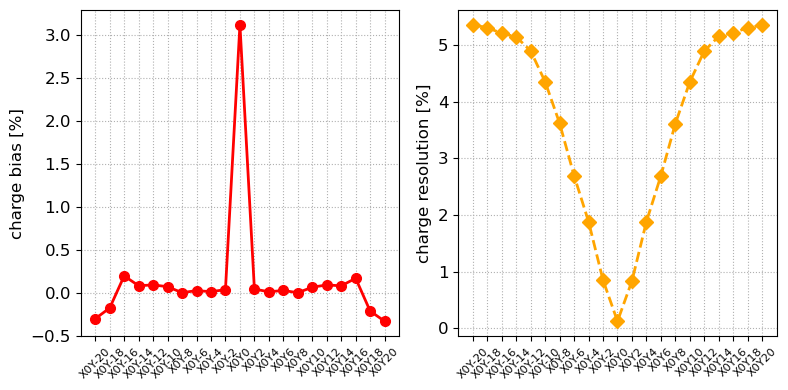

In [19]:
draw_charge_reconstruction(fit_results_filtered, 1.0, xticksize=8)

+++ Resolution from fitting: 0.1239% with x-strip: X0Y0.
--- Bias from fitting: 0.0236% with x-strip: X0Y0.
+++ Resolution from fitting: 0.1225% with x-strip: X0Y0X0Y-6.
--- Bias from fitting: 0.0186% with x-strip: X0Y0X0Y-6.
+++ Resolution from fitting: 0.1225% with x-strip: X0Y0X0Y6.
--- Bias from fitting: 0.0186% with x-strip: X0Y0X0Y6.
+++ Resolution from fitting: 0.1217% with x-strip: X0Y-6X0Y0X0Y6.
--- Bias from fitting: 0.0258% with x-strip: X0Y-6X0Y0X0Y6.
+++ Resolution from fitting: 0.1219% with x-strip: X0Y0X0Y6, y-strip: X0Y0.
--- Bias from fitting: 0.0252% with x-strip: X0Y0X0Y6, y-strip: X0Y0.
+++ Resolution from fitting: 0.1179% with x-strip: X0Y0X0Y6, y-strip: X0Y0X6Y0.
--- Bias from fitting: 0.0123% with x-strip: X0Y0X0Y6, y-strip: X0Y0X6Y0.
+++ Resolution from fitting: 0.1182% with x-strip: X0Y-6X0Y0X0Y6, y-strip: X0Y0X6Y0X-6Y0.
--- Bias from fitting: 0.0133% with x-strip: X0Y-6X0Y0X0Y6, y-strip: X0Y0X6Y0X-6Y0.


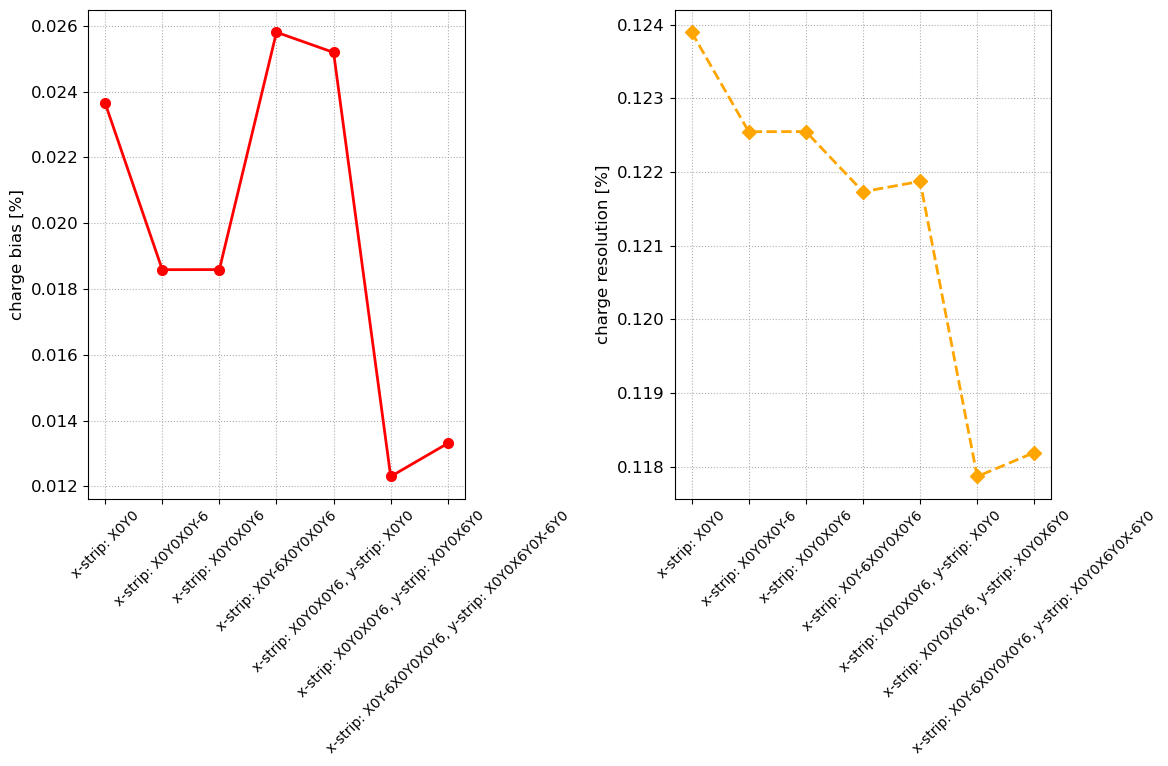

In [40]:

fit_results_coll = {}
for k, v in fit_results.items():
    if k == 'x-strip: X0Y-6' or k == 'x-strip: X0Y6':
        continue
    else:
        fit_results_coll[k] = v
draw_charge_reconstruction(fit_results_coll, 1.0, xticksize=10)

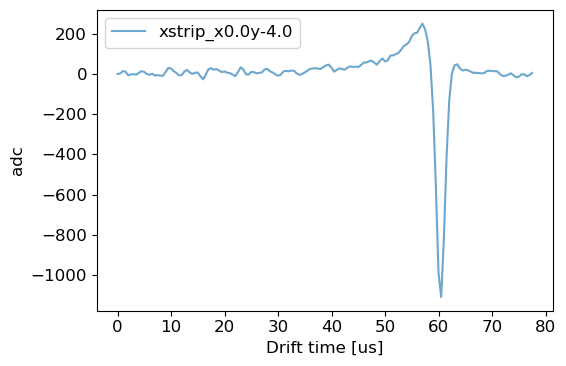

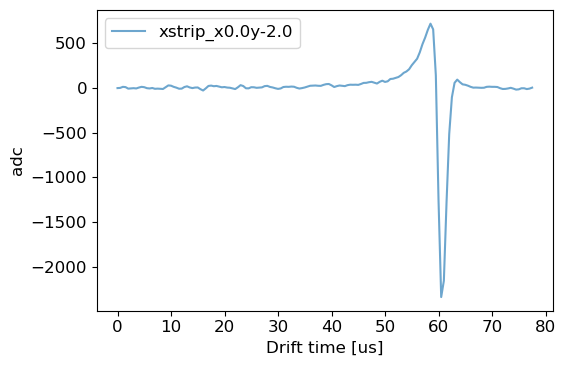

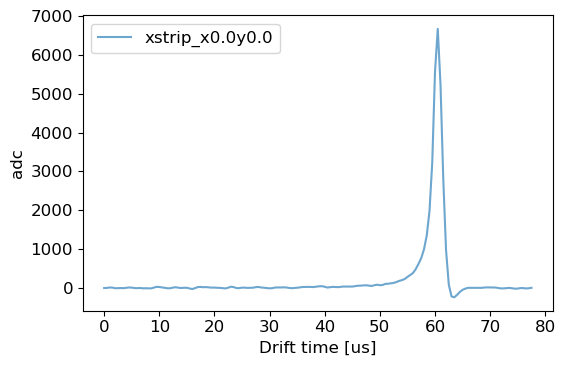

In [49]:
from toyMC_loader import toyMC_loader
loader = toyMC_loader()

loader.toyMC_filename = '../../toyMC_dataset/data-xstripx0.0y-4-q100000.0x1.0y0.0z100.0.h5'
loader.display_event_multiChannels(1921)

loader.toyMC_filename = '../../toyMC_dataset/data-xstripx0.0y-2-q100000.0x1.0y0.0z100.0.h5'
loader.display_event_multiChannels(1921)

loader.toyMC_filename = '../../toyMC_dataset/data-xstripx0.0y0-q100000.0x1.0y0.0z100.0.h5'
loader.display_event_multiChannels(1921)


In [4]:

input_list = [ 
             '/Users/yumiao/Documents/Works/0nbb/nEXO/Reconstruction/waveform/toyMC_dataset/data-xstripx0y0-q100000.0x3.0y0.0z100.0.h5' ,\
             ]

labels = ['X0Y0']

x0, y0, z0, q0, t0 = 3.0, 0.0, 100., 1.0, 0
import sys
sys.path.append('../')
from importlib import reload
import waveform_fit

reload(waveform_fit)
from waveform_fit import fitter
    
fitter = fitter(SamplingFrequency=2)
fitter.load_gridPDFs()
from toyMC_loader import toyMC_loader
loader = toyMC_loader()

fit_results0 = fitting(fitter, loader, input_list, labels, x0, y0, z0, q0)

#loader.toyMC_filename = input_list[0]
#loader.load_h5file_multiChannels(992)
#times, wfs, sxs, sys, ystrips = loader.assembling_for_fitter()

#m = fitter.oneCluster_fitting(times, wfs, t0, x0, y0, z0, q0, sxs, sys, ystrips)

NameError: name 'fitting' is not defined

In [18]:
m.covariance

┌────┬──────────────────────────────────────────────┐
│    │       t0       x0       y0       z0       Q0 │
├────┼──────────────────────────────────────────────┤
│ t0 │        0        0        0        0        0 │
│ x0 │        0   0.0936        0 0.000577 -2.5e-05 │
│ y0 │        0        0     2.03        0        0 │
│ z0 │        0 0.000577        0 8.73e-06 -5.8e-07 │
│ Q0 │        0 -2.5e-05        0 -5.8e-07 1.02e-06 │
└────┴──────────────────────────────────────────────┘

In [3]:
import sys
sys.path.append('../')

from nEXO_loader import loader

nexo_loader = loader()
nexo_loader._load_event()